In [1]:
from models import SNGAN
from training.train_GAN import train_BasicGAN

ModuleNotFoundError: No module named 'training.train_GAN'

In [6]:
import torch
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import os

# Path to MNIST data
data_dir = os.path.join(os.getcwd(), "..", "data", "raw")  # Move up from notebooks/

# Define transformation (convert images to tensors)
transform = transforms.Compose([transforms.ToTensor()])

# Load dataset
train_dataset = datasets.MNIST(root=data_dir, train=True, transform=transform, download=False)
test_dataset = datasets.MNIST(root=data_dir, train=False, transform=transform, download=False)

# Create DataLoader for batching
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Check sample
images, labels = next(iter(train_loader))
print(f"Loaded batch of {images.shape}")

Loaded batch of torch.Size([64, 1, 28, 28])


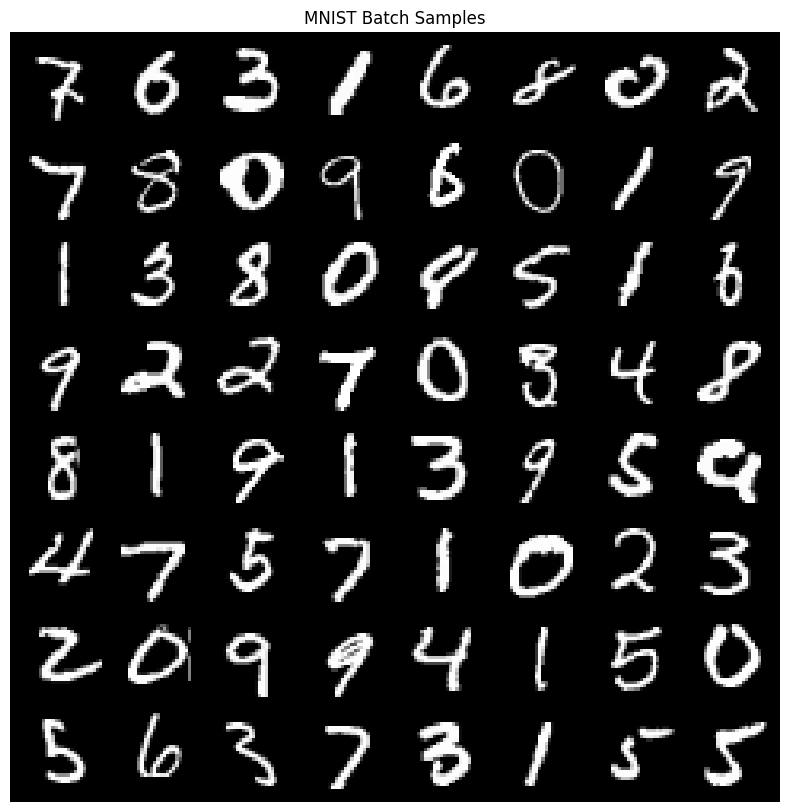

In [ ]:
import matplotlib.pyplot as plt
import torchvision.utils

# Function to plot all images in a batch
def plot_batch_images(images, labels):
    batch_size = images.shape[0]
    grid_img = torchvision.utils.make_grid(images, nrow=8, normalize=True)  # Arrange images in grid
    plt.figure(figsize=(10, 10))
    plt.imshow(grid_img.permute(1, 2, 0))  # Convert from (C, H, W) to (H, W, C)
    plt.axis("off")
    plt.title("MNIST Batch Samples")
    plt.show()

# Plot the batch of images
plot_batch_images(images, labels)  # (64, 1, 28, 28) -> (Batch, Channels, Height, Width)